# Проект для оценки цены квартир по заданным параметрам в трёх крупных городах 

# Данные : 10000 наблюдений из Somon.tj

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_excel('somontjcleaned.xlsx')
data

,city,cost,market,remodel,rooms,floor,area,address
0,Душанбе,2850000,Новостройка,Новый ремонт,3,15,200,Центр
1,Душанбе,2000000,Новостройка,Новый ремонт,5,5,200,Сомони
2,Душанбе,1800000,Новостройка,Без ремонта (коробка),3,5,200,Центр Рудаки Плаза Сафо
3,Душанбе,450000,Вторичный рынок,С ремонтом,6,1,200,Фирдавсй
4,Душанбе,430000,Вторичный рынок,С ремонтом,5,1,200,Фирдавси
...,...,...,...,...,...,...,...,...
8408,Душанбе,168000,Новостройка,Новый ремонт,1,11,22,Фирдавси
8409,Душанбе,130000,Вторичный рынок,С ремонтом,1,3,22,Маяковский
8410,Душанбе,207000,Новостройка,Новый ремонт,1,2,22,Сино
8411,Душанбе,208000,Новостройка,С ремонтом,1,2,22,Гипрозем


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8413 entries, 0 to 8412
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     8413 non-null   object
 1   cost     8413 non-null   int64 
 2   market   8413 non-null   object
 3   remodel  8413 non-null   object
 4   rooms    8413 non-null   int64 
 5   floor    8413 non-null   int64 
 6   area     8413 non-null   int64 
 7   address  8053 non-null   object
dtypes: int64(4), object(4)
memory usage: 525.9+ KB


In [4]:
data = data.drop(['city'], axis = 1)
data 

,cost,market,remodel,rooms,floor,area,address
0,2850000,Новостройка,Новый ремонт,3,15,200,Центр
1,2000000,Новостройка,Новый ремонт,5,5,200,Сомони
2,1800000,Новостройка,Без ремонта (коробка),3,5,200,Центр Рудаки Плаза Сафо
3,450000,Вторичный рынок,С ремонтом,6,1,200,Фирдавсй
4,430000,Вторичный рынок,С ремонтом,5,1,200,Фирдавси
...,...,...,...,...,...,...,...
8408,168000,Новостройка,Новый ремонт,1,11,22,Фирдавси
8409,130000,Вторичный рынок,С ремонтом,1,3,22,Маяковский
8410,207000,Новостройка,Новый ремонт,1,2,22,Сино
8411,208000,Новостройка,С ремонтом,1,2,22,Гипрозем


# Анализириуем некоторые переменные и проверяем данные на наличие выбросов, и избавляемся от них 

In [5]:
data.area.describe()

count    8413.000000
mean       67.537620
std        27.742077
min        21.000000
25%        49.000000
50%        61.000000
75%        80.000000
max       200.000000
Name: area, dtype: float64

In [6]:
data.max()

C:\Users\user\AppData\Local\Temp\ipykernel_11824\2904433368.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.max()


cost          10000000
market     Новостройка
remodel     С ремонтом
rooms                8
floor               23
area               200
dtype: object

In [7]:
data.min()

C:\Users\user\AppData\Local\Temp\ipykernel_11824\927168777.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.min()


cost                      100000
market           Вторичный рынок
remodel    Без ремонта (коробка)
rooms                          1
floor                          1
area                          21
dtype: object

In [8]:
data = data.drop(data[data['cost'] > 2500000].index)
data = data.drop(data[data['cost'] < 220000].index)
data = data.drop(data[data['area'] < 25].index)
data = data.dropna()
# Выводим DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7115 entries, 1 to 8351
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cost     7115 non-null   int64 
 1   market   7115 non-null   object
 2   remodel  7115 non-null   object
 3   rooms    7115 non-null   int64 
 4   floor    7115 non-null   int64 
 5   area     7115 non-null   int64 
 6   address  7115 non-null   object
dtypes: int64(4), object(3)
memory usage: 444.7+ KB


# Переводим переменные из номинального типа в количественный

In [9]:
data.remodel.value_counts()

С ремонтом               2966
Без ремонта (коробка)    2292
Новый ремонт             1857
Name: remodel, dtype: int64

In [10]:
remodel_map={'Без ремонта (коробка)':1, 'С ремонтом': 2, 'Новый ремонт' : 3}
data['remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)']=data['remodel'].map(remodel_map)
data = data.drop(['remodel'], axis = 1)
data

,cost,market,rooms,floor,area,address,remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)
1,2000000,Новостройка,5,5,200,Сомони,3
2,1800000,Новостройка,3,5,200,Центр Рудаки Плаза Сафо,1
3,450000,Вторичный рынок,6,1,200,Фирдавсй,2
4,430000,Вторичный рынок,5,1,200,Фирдавси,2
5,1500000,Новостройка,6,10,197,Профсоюз,3
...,...,...,...,...,...,...,...
8340,220000,Вторичный рынок,1,2,25,Фирдавси,2
8341,240000,Вторичный рынок,1,2,25,Сино,3
8343,285000,Вторичный рынок,2,1,25,Фирдавси,2
8348,370000,Вторичный рынок,1,1,25,Шохмансур,2


In [11]:
data.market.value_counts()

Новостройка        4399
Вторичный рынок    2716
Name: market, dtype: int64

In [12]:
market_map={'Новостройка':1, 'Вторичный рынок': 2}
data['market_code(1 - Новостройка ; 2 - Вторичный рынок)'] = data['market'].map(market_map)
data = data.drop(['market'], axis = 1)
data

,cost,rooms,floor,area,address,remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),market_code(1 - Новостройка ; 2 - Вторичный рынок)
1,2000000,5,5,200,Сомони,3,1
2,1800000,3,5,200,Центр Рудаки Плаза Сафо,1,1
3,450000,6,1,200,Фирдавсй,2,2
4,430000,5,1,200,Фирдавси,2,2
5,1500000,6,10,197,Профсоюз,3,1
...,...,...,...,...,...,...,...
8340,220000,1,2,25,Фирдавси,2,2
8341,240000,1,2,25,Сино,3,2
8343,285000,2,1,25,Фирдавси,2,2
8348,370000,1,1,25,Шохмансур,2,2


In [13]:
a = data.address.to_numpy()
for i in range(7115):
    w = str(a[i])
    w = w.lower()
    if(('садбарг' in w) or ("ропо" in w) or ("километр" in w) or ("мансур" in w) or ("зелёный" in w) or ("зеленый" in w) or ("хитой" in w) or ("китай" in w) or ("айн" in w) or ("км" in w) or ('ватан' in w) or  ('жилм' in w)or ("мавлоно" in w) or ("экран" in w) or ("тан" in w)):
        a[i] = 1
    elif(("центр" in w) or ("педи" in w) or ("ргон" in w) or ('сомон' in w) or ('алфемо' in w) or ('дом' in w) or ('опер' in w) or ("ашан" in w) or ("спартак" in w) or ("пайкар" in w)):
        a[i] = 2
    elif(("син" in w) or ('ковск' in w) or ('мардон' in w) or ('автовокзал' in w) or ('зарнисор' in w) or ('якка' in w) or ('испечак' in w) or ("зараф" in w) or ('союз' in w) or ("араболо" in w) or ("саодат" in w) or ("ширин" in w) or ('81'  in w) or ('33' in w) or ('31' in w) or ('32' in w) or ('82' in w) or ('83' in w) or ('84' in w) or ('91' in w) or ('92' in w) or ('101' in w) or ('102' in w) or ('103' in w) or ('104' in w) or ('112' in w)):
        a[i] = 3
    elif(("гипр" in w) or ("гулистон" in w) or ("политехникум" in w) or ('фирда' in w) or ('россия' in w) or ('дёжн' in w) or ('дежн' in w) or ("саховат" in w) or ("советс" in w) or ('корвон' in w) or ('гипр' in w) or ("цирк" in w) or ("46" in w) or ("61" in w) or ("62" in w) or ("63" in w) or ("65" in w) or ("64" in w)):
        a[i] = 4
    else:
        a[i] = 0
        
data.address = a
data


,cost,rooms,floor,area,address,remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),market_code(1 - Новостройка ; 2 - Вторичный рынок)
1,2000000,5,5,200,2,3,1
2,1800000,3,5,200,2,1,1
3,450000,6,1,200,4,2,2
4,430000,5,1,200,4,2,2
5,1500000,6,10,197,3,3,1
...,...,...,...,...,...,...,...
8340,220000,1,2,25,4,2,2
8341,240000,1,2,25,3,3,2
8343,285000,2,1,25,4,2,2
8348,370000,1,1,25,1,2,2


In [14]:
data = data.drop(data[data['address'] == 0].index)

# Выводим DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6432 entries, 1 to 8351
Data columns (total 7 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   cost                                                                6432 non-null   int64 
 1   rooms                                                               6432 non-null   int64 
 2   floor                                                               6432 non-null   int64 
 3   area                                                                6432 non-null   int64 
 4   address                                                             6432 non-null   object
 5   remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)  6432 non-null   int64 
 6   market_code(1 - Новостройка ; 2 - Вторичный рынок)                  6432 non-null   int64 
dtypes: int64(6), object(1)
me

In [15]:
EmbarkedData=pd.get_dummies(data.address, prefix='district')
EmbarkedData=pd.concat((EmbarkedData, data.address), axis=1)
data=pd.concat((data, EmbarkedData), axis=1)
data

C:\Users\user\AppData\Local\Temp\ipykernel_11824\3123142921.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  EmbarkedData=pd.get_dummies(data.address, prefix='district')


,cost,rooms,floor,area,address,remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),market_code(1 - Новостройка ; 2 - Вторичный рынок),district_1,district_2,district_3,district_4,address
1,2000000,5,5,200,2,3,1,0,1,0,0,2
2,1800000,3,5,200,2,1,1,0,1,0,0,2
3,450000,6,1,200,4,2,2,0,0,0,1,4
4,430000,5,1,200,4,2,2,0,0,0,1,4
5,1500000,6,10,197,3,3,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8340,220000,1,2,25,4,2,2,0,0,0,1,4
8341,240000,1,2,25,3,3,2,0,0,1,0,3
8343,285000,2,1,25,4,2,2,0,0,0,1,4
8348,370000,1,1,25,1,2,2,1,0,0,0,1


In [16]:
data.rename(columns={"district_1": "Shohmansur"}, inplace=True)
data.rename(columns={"district_2": "Somoni"}, inplace=True)
data.rename(columns={"district_3": "Sino"}, inplace=True)
data.rename(columns={"district_4": "Firdavsi"}, inplace=True)
data = data.drop(['address'], axis = 1)
data

,cost,rooms,floor,area,remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),market_code(1 - Новостройка ; 2 - Вторичный рынок),Shohmansur,Somoni,Sino,Firdavsi
1,2000000,5,5,200,3,1,0,1,0,0
2,1800000,3,5,200,1,1,0,1,0,0
3,450000,6,1,200,2,2,0,0,0,1
4,430000,5,1,200,2,2,0,0,0,1
5,1500000,6,10,197,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8340,220000,1,2,25,2,2,0,0,0,1
8341,240000,1,2,25,3,2,0,0,1,0
8343,285000,2,1,25,2,2,0,0,0,1
8348,370000,1,1,25,2,2,1,0,0,0


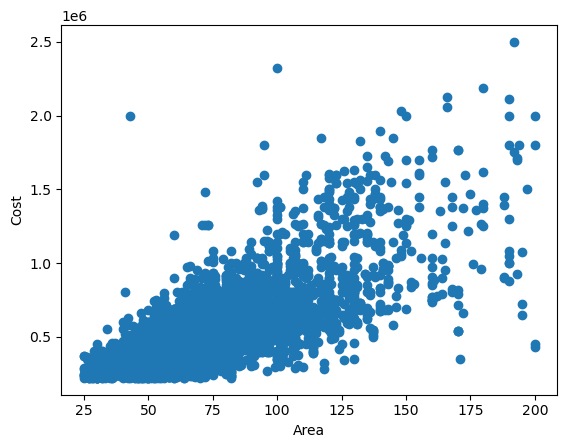

In [17]:
import matplotlib.pyplot as plt

# Ввод данных
x = data.area
y = data.cost

# Создание графика
plt.scatter(x, y)

# Настройка графика
plt.xlabel("Area")
plt.ylabel("Cost")
plt.show()

## 4 mln max

In [18]:
data.corr()

,cost,rooms,floor,area,remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),market_code(1 - Новостройка ; 2 - Вторичный рынок),Shohmansur,Somoni,Sino,Firdavsi
cost,1.000000,0.549275,0.027101,0.732661,0.219853,-0.101569,-0.008898,0.293954,-0.069135,-0.157336
rooms,0.549275,1.000000,-0.112616,0.622937,0.138791,0.212347,-0.045414,-0.042541,0.043074,0.026854
floor,0.027101,-0.112616,1.000000,0.222560,-0.203896,-0.496823,0.125043,0.191951,-0.165279,-0.080921
area,0.732661,0.622937,0.222560,1.000000,-0.099861,-0.261988,0.063535,0.217945,-0.128471,-0.089433
remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),0.219853,0.138791,-0.203896,-0.099861,1.000000,0.160334,-0.121709,-0.119793,0.159429,0.023625
market_code(1 - Новостройка ; 2 - Вторичный рынок),-0.101569,0.212347,-0.496823,-0.261988,0.160334,1.000000,-0.146949,-0.202123,0.197863,0.070801
Shohmansur,-0.008898,-0.045414,0.125043,0.063535,-0.121709,-0.146949,1.000000,-0.194213,-0.437309,-0.250439
Somoni,0.293954,-0.042541,0.191951,0.217945,-0.119793,-0.202123,-0.194213,1.000000,-0.372971,-0.213594
Sino,-0.069135,0.043074,-0.165279,-0.128471,0.159429,0.197863,-0.437309,-0.372971,1.000000,-0.480949
Firdavsi,-0.157336,0.026854,-0.080921,-0.089433,0.023625,0.070801,-0.250439,-0.213594,-0.480949,1.000000


# Обучаем модель, сначала определяем какое значение Random State and Max_Depth самые оптимальные

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import r2_score
# X = data.drop(['cost'], axis = 1)
# y = data.cost
# mx_score = 0 
# mx_rs = 0
# # Разделяем данные на обучающую и тестовую выборки
# for i in range(1, 200):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = i)
#     model = DecisionTreeRegressor()

#     model.fit(X_train, y_train)

#     # Оцениваем модель на тестовой выборке
#     predictions = model.predict(X_test)
    
#     # Вычисляем RMSE
#     r2 = r2_score(y_test, predictions)
#     if(r2 > mx_score):
#         mx_score = r2
#         mx_rs = i
# print(mx_score)
# print(mx_rs)

In [20]:
# mx_score = 0
# mx_d = 0
# # Разделяем данные на обучающую и тестовую выборки
# for i in range(1, 10):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 74)
#     model = DecisionTreeRegressor(max_depth=i)

#     model.fit(X_train, y_train)

#     # Оцениваем модель на тестовой выборке
#     predictions = model.predict(X_test)
    
#     # Вычисляем RMSE
#     r2 = r2_score(y_test, predictions)
#     if(r2 > mx_score):
#         mx_score = r2
#         mx_d = i
# print(mx_score)
# print(mx_d)

In [21]:
X = data.drop(['cost'], axis = 1)
y = data.cost

parameters = {
    "n_estimators": [100, 200, 300],
    "max_depth": [5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1],
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)
clf.fit(X_train, y_train)

# Выводим лучшие параметры
print(clf.best_params_)


{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}


In [22]:
mx_score = 0
mx_d = 0
for i in range(1, 300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = i)
    model = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 5, n_estimators = 200)

    model.fit(X_train, y_train)

#     # Оцениваем модель на тестовой выборке
    predictions = model.predict(X_test)
    
#     # Вычисляем RMSE
    r2 = r2_score(y_test, predictions)
    if(r2 > mx_score):
        mx_score = r2
        mx_d = i
print(mx_score)
print(mx_d)

0.8217379226471689
59


In [23]:
X = data.drop(['cost'],  axis = 1)
y = data.cost

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 59)
model_for_Dushanbe = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 5, n_estimators = 200)
model_for_Dushanbe.fit(X_train, y_train)

predictions = model_for_Dushanbe.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R-Square:", r2)

R-Square: 0.8213627891749391


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6432 entries, 1 to 8351
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   cost                                                                6432 non-null   int64
 1   rooms                                                               6432 non-null   int64
 2   floor                                                               6432 non-null   int64
 3   area                                                                6432 non-null   int64
 4   remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)  6432 non-null   int64
 5   market_code(1 - Новостройка ; 2 - Вторичный рынок)                  6432 non-null   int64
 6   Shohmansur                                                          6432 non-null   uint8
 7   Somoni                           

In [25]:
predictions = model_for_Dushanbe.predict([[3, 6, 106, 2, 1,0, 0, 0, 1],
                                         [3, 10, 97, 2, 2, 1, 0, 0, 0],
                                         [3, 5, 125, 1, 1, 1, 0,0,0],
                                         [3, 3, 70, 1, 1, 0, 1, 0 ,0]])

for i in predictions:
    print('Price', int(i))

Price 758366
Price 677415
Price 691161
Price 516906


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [26]:
# confidence = 0.95
# squared_errors = (predictions - y_test) ** 2
# mse = np.mean(squared_errors)
# margin_of_error = 1.96 * np.sqrt(mse / len(X_test))  # 1.96 - для 95% доверительного интервала
# lower_bound = int(predictions - margin_of_error)
# upper_bound = int(predictions + margin_of_error)
# print(lower_bound)
# print(predictions)
# print(upper_bound)

# Модель для оценки квартир в городе Худжанд

In [27]:
dt = pd.read_excel('somontj.xlsx')
data1 = dt.loc[dt["city"] == 'Худжанд']
data1 = data1.drop(['city'], axis = 1)
data1

,cost,market,remodel,rooms,floor,area,address
9413,995000,Вторичный рынок,Новый ремонт,5,7,114,Исмоили Сомони 20
9414,990000,Вторичный рынок,С ремонтом,4,6,133,Центр
9415,980000,Новостройка,Новый ремонт,4,6,96,19 мкр
9416,950000,Новостройка,С ремонтом,5,2,150,13 мкр
9417,920000,Новостройка,С ремонтом,2,8,95,Улица мира
...,...,...,...,...,...,...,...
10614,115000,Вторичный рынок,С ремонтом,1,1,36,Чойрух
10615,115000,Новостройка,Без ремонта (коробка),1,1,38,18 мкр
10616,1145000,Новостройка,С ремонтом,4,11,240,19 мкр
10617,1034500,Новостройка,С ремонтом,3,6,80,Исмоили Сомони


In [28]:
market_map={'Новостройка':1, 'Вторичный рынок': 2}
data1['market_code(1 - Новостройка ; 2 - Вторичный рынок)'] = data1['market'].map(market_map)
data1 = data1.drop(['market'], axis = 1)

In [29]:
remodel_map={'Без ремонта (коробка)':1, 'С ремонтом': 2, 'Новый ремонт' : 3}
data1['remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)']=data1['remodel'].map(remodel_map)
data1 = data1.drop(['remodel'], axis = 1)
data1

,cost,rooms,floor,area,address,market_code(1 - Новостройка ; 2 - Вторичный рынок),remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)
9413,995000,5,7,114,Исмоили Сомони 20,2,3
9414,990000,4,6,133,Центр,2,2
9415,980000,4,6,96,19 мкр,1,3
9416,950000,5,2,150,13 мкр,1,2
9417,920000,2,8,95,Улица мира,1,2
...,...,...,...,...,...,...,...
10614,115000,1,1,36,Чойрух,2,2
10615,115000,1,1,38,18 мкр,1,1
10616,1145000,4,11,240,19 мкр,1,2
10617,1034500,3,6,80,Исмоили Сомони,1,2


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1206 entries, 9413 to 10618
Data columns (total 7 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   cost                                                                1206 non-null   int64 
 1   rooms                                                               1206 non-null   int64 
 2   floor                                                               1206 non-null   int64 
 3   area                                                                1206 non-null   int64 
 4   address                                                             1206 non-null   object
 5   market_code(1 - Новостройка ; 2 - Вторичный рынок)                  1206 non-null   int64 
 6   remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)  1206 non-null   int64 
dtypes: int64(6), object(1

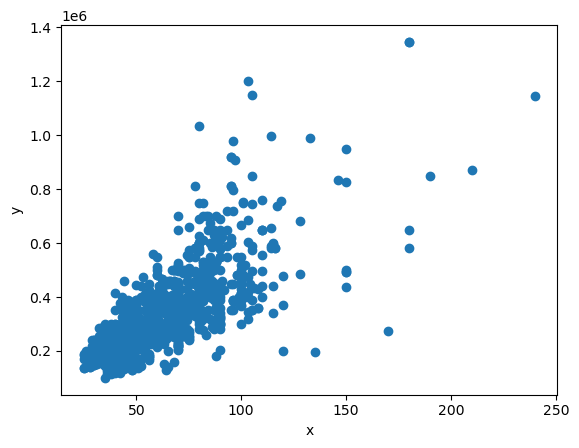

In [31]:
# Ввод данных
x = data1.area
y = data1.cost

# Создание графика
plt.scatter(x, y)

# Настройка графика
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [32]:
data1.address.value_counts()
a = data1.address.to_numpy()
a = list(a)

In [33]:
for i in range(1206):
    w = str(a[i])
    w = w.lower()
    if(('12' in w) or ('13' in w)or ('3' in w) or ('8' in w)):
        a[i] = 1
    elif(('20' in w) or ('мир' in w) or ('27' in w) or ('сомони' in w)or ('19' in w) or ('18' in w)or ('17' in w)):
        a[i] = 2
    elif(('стадион' in w) or ('анис' in w)or ('центр' in w) or ('гулбахор' in w) or ('шанбе' in w) or ('ператор' in w) or ('ватан' in w) or ('универмаг' in w) or ('тобон' in w)or ('рудаки' in w) or ('гулистон' in w)):
        a[i] = 3
    elif(('шёлкокомбинат' in w) or ('шелкокомбинат' in w)or ('шёлкомбинат' in w) or ('шелкомбинат' in w) or ('бинат') in w):
        a[i] = 4
    elif(('пахтакор' in w)):
        a[i] = 5
    else:
        a[i] = 0


In [34]:
data1.address = a
data1

,cost,rooms,floor,area,address,market_code(1 - Новостройка ; 2 - Вторичный рынок),remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)
9413,995000,5,7,114,2,2,3
9414,990000,4,6,133,3,2,2
9415,980000,4,6,96,2,1,3
9416,950000,5,2,150,1,1,2
9417,920000,2,8,95,2,1,2
...,...,...,...,...,...,...,...
10614,115000,1,1,36,0,2,2
10615,115000,1,1,38,1,1,1
10616,1145000,4,11,240,2,1,2
10617,1034500,3,6,80,2,1,2


In [35]:
EmbarkedData=pd.get_dummies(data1.address, prefix='district')
EmbarkedData=pd.concat((EmbarkedData, data1.address), axis=1)
data1=pd.concat((data1, EmbarkedData), axis=1)
data1

,cost,rooms,floor,area,address,market_code(1 - Новостройка ; 2 - Вторичный рынок),remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),district_0,district_1,district_2,district_3,district_4,district_5,address
9413,995000,5,7,114,2,2,3,0,0,1,0,0,0,2
9414,990000,4,6,133,3,2,2,0,0,0,1,0,0,3
9415,980000,4,6,96,2,1,3,0,0,1,0,0,0,2
9416,950000,5,2,150,1,1,2,0,1,0,0,0,0,1
9417,920000,2,8,95,2,1,2,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,115000,1,1,36,0,2,2,1,0,0,0,0,0,0
10615,115000,1,1,38,1,1,1,0,1,0,0,0,0,1
10616,1145000,4,11,240,2,1,2,0,0,1,0,0,0,2
10617,1034500,3,6,80,2,1,2,0,0,1,0,0,0,2


In [36]:
data1.rename(columns={"district_1": "3, 8, 12, 13"}, inplace=True)
data1.rename(columns={"district_2": "ул. мира, 20"}, inplace=True)
data1.rename(columns={"district_3": "панчшанбе, стадион, гулистон"}, inplace=True)
data1.rename(columns={"district_4": "шёлкокомбинат"}, inplace=True)
data1.rename(columns={"district_5": "пахтакор"}, inplace=True)
data1 = data1.drop(['address'], axis = 1)
data1 = data1.drop(['district_0'], axis = 1)
data1

,cost,rooms,floor,area,market_code(1 - Новостройка ; 2 - Вторичный рынок),remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),"3, 8, 12, 13","ул. мира, 20","панчшанбе, стадион, гулистон",шёлкокомбинат,пахтакор
9413,995000,5,7,114,2,3,0,1,0,0,0
9414,990000,4,6,133,2,2,0,0,1,0,0
9415,980000,4,6,96,1,3,0,1,0,0,0
9416,950000,5,2,150,1,2,1,0,0,0,0
9417,920000,2,8,95,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10614,115000,1,1,36,2,2,0,0,0,0,0
10615,115000,1,1,38,1,1,1,0,0,0,0
10616,1145000,4,11,240,1,2,0,1,0,0,0
10617,1034500,3,6,80,1,2,0,1,0,0,0


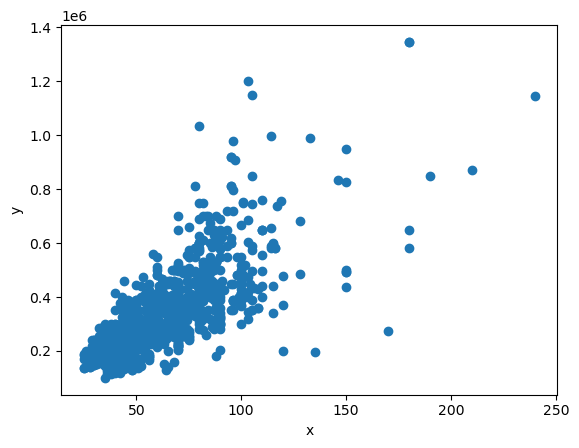

In [37]:
# Ввод данных
x = data1.area
y = data1.cost

# Создание графика
plt.scatter(x, y)

# Настройка графика
plt.xlabel("x")
plt.ylabel("y")
plt.show()

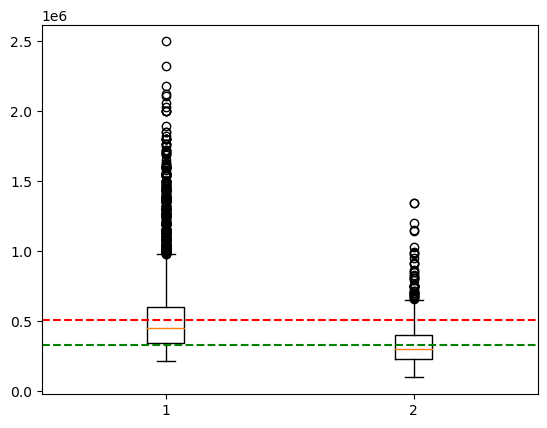

In [38]:
# Создайте данные
x = data.cost
y = data1.cost

# Нарисуйте боксплот
plt.boxplot([x, y])

# Добавьте среднее значение
plt.axhline(np.mean(x), color="red", linestyle="--")
plt.axhline(np.mean(y), color="green", linestyle="--")

# Показать график
plt.show()


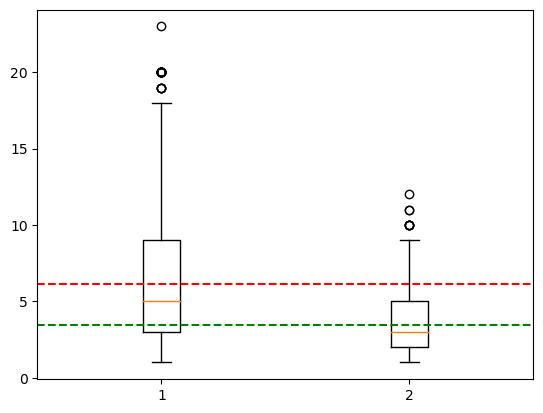

In [39]:
# Создайте данные
x = data.floor
y = data1.floor

# Нарисуйте боксплот
plt.boxplot([x, y])

# Добавьте среднее значение
plt.axhline(np.mean(x), color="red", linestyle="--")
plt.axhline(np.mean(y), color="green", linestyle="--")

# Показать график
plt.show()


In [40]:
data1.corr()

,cost,rooms,floor,area,market_code(1 - Новостройка ; 2 - Вторичный рынок),remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),"3, 8, 12, 13","ул. мира, 20","панчшанбе, стадион, гулистон",шёлкокомбинат,пахтакор
cost,1.000000,0.663859,0.139869,0.746825,-0.123660,0.126814,-0.247610,0.313010,0.080912,-0.004085,-0.102636
rooms,0.663859,1.000000,0.028022,0.746518,0.171795,0.010960,-0.064861,0.083109,-0.002973,-0.004342,-0.017183
floor,0.139869,0.028022,1.000000,0.180528,-0.158618,-0.094860,-0.068343,0.116626,0.088851,0.013675,-0.118629
area,0.746825,0.746518,0.180528,1.000000,-0.219303,-0.113284,-0.111734,0.209336,-0.006816,-0.023488,-0.113016
market_code(1 - Новостройка ; 2 - Вторичный рынок),-0.123660,0.171795,-0.158618,-0.219303,1.000000,0.157388,0.097558,-0.272266,0.011983,0.032937,0.099843
remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),0.126814,0.010960,-0.094860,-0.113284,0.157388,1.000000,0.005386,0.028862,-0.092922,0.018403,0.035567
"3, 8, 12, 13",-0.247610,-0.064861,-0.068343,-0.111734,0.097558,0.005386,1.000000,-0.591158,-0.304063,-0.254707,-0.177872
"ул. мира, 20",0.313010,0.083109,0.116626,0.209336,-0.272266,0.028862,-0.591158,1.000000,-0.139982,-0.117260,-0.081887
"панчшанбе, стадион, гулистон",0.080912,-0.002973,0.088851,-0.006816,0.011983,-0.092922,-0.304063,-0.139982,1.000000,-0.060313,-0.042119
шёлкокомбинат,-0.004085,-0.004342,0.013675,-0.023488,0.032937,0.018403,-0.254707,-0.117260,-0.060313,1.000000,-0.035282


In [41]:
X = data1.drop(['cost'], axis = 1)
y = data1.cost

parameters = {
    "max_depth": [1, 3, 5, 7],
    "min_samples_split": [2, 5, 10],
}

# Обучаем модель на кросс-валидации
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=5)
clf.fit(X, y)

# Выводим лучшие параметры
print(clf.best_params_)

{'max_depth': 5, 'min_samples_split': 10}


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_for_Khujand = DecisionTreeRegressor(max_depth = 5, min_samples_split = 100)

model_for_Khujand.fit(X_train, y_train)

# Оцениваем модель на тестовой выборке
predictions = model_for_Khujand.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R-Square:", r2)

R-Square: 0.47399118037555577


In [43]:
X = data1.drop(['cost'], axis = 1)
y = data1.cost

parameters = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1],
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = GridSearchCV(GradientBoostingRegressor(), parameters, cv=4)
clf.fit(X_train, y_train)

# Выводим лучшие параметры
print(clf.best_params_)


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


In [44]:
mx_score = 0
mx_d = 0
for i in range(1, 300):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = i)
    model = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5, n_estimators = 300)

    model.fit(X_train, y_train)

#     # Оцениваем модель на тестовой выборке
    predictions = model.predict(X_test)
    
#     # Вычисляем RMSE
    r2 = r2_score(y_test, predictions)
    if(r2 > mx_score):
        mx_score = r2
        mx_d = i
print(mx_score)
print(mx_d)

0.8352901636341967
88


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 88)
model_for_Khujand = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 5, n_estimators = 300)

model_for_Khujand.fit(X_train, y_train)

# Оцениваем модель на тестовой выборке
predictions = model_for_Khujand.predict(X_test)
r2 = r2_score(y_test, predictions)
print("R-Square:", r2)

R-Square: 0.8352560632617968


In [46]:
data1

,cost,rooms,floor,area,market_code(1 - Новостройка ; 2 - Вторичный рынок),remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт),"3, 8, 12, 13","ул. мира, 20","панчшанбе, стадион, гулистон",шёлкокомбинат,пахтакор
9413,995000,5,7,114,2,3,0,1,0,0,0
9414,990000,4,6,133,2,2,0,0,1,0,0
9415,980000,4,6,96,1,3,0,1,0,0,0
9416,950000,5,2,150,1,2,1,0,0,0,0
9417,920000,2,8,95,1,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10614,115000,1,1,36,2,2,0,0,0,0,0
10615,115000,1,1,38,1,1,1,0,0,0,0
10616,1145000,4,11,240,1,2,0,1,0,0,0
10617,1034500,3,6,80,1,2,0,1,0,0,0


In [47]:
predictions = model_for_Khujand.predict([[5, 10, 100, 2, 2, 2]])
# predictions = int(predictions)
predictions

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but GradientBoostingRegressor is expecting 10 features as input.

In [ ]:
# confidence = 0.95
# squared_errors = (predictions - y_test) ** 2
# mse = np.mean(squared_errors)
# margin_of_error = 1.96 * np.sqrt(mse / len(X_test))  # 1.96 - для 95% доверительного интервала
# lower_bound = int(predictions - margin_of_error)
# upper_bound = int(predictions + margin_of_error)
# print(lower_bound)
# print(predictions)
# print(upper_bound)

# Модель для оценки цены квартир в г.Бохтар

In [ ]:
data3 = data2.loc[data2["city"] == 'Бохтар (Курган-Тюбе)']
data3

In [ ]:
remodel_map={'Без ремонта (коробка)':1, 'С ремонтом': 2, 'Новый ремонт' : 3}
data3['remodel_code (1 - без ремонта ; 2 - С ремонтом ; 3 - Новый ремонт)']=data3['remodel'].map(remodel_map)
data3 = data3.drop(['remodel'], axis = 1)

In [ ]:
market_map={'Новостройка':1, 'Вторичный рынок': 2}
data3['market_code(1 - Новостройка ; 2 - Вторичный рынок)'] = data3['market'].map(market_map)
data3 = data3.drop(['market'], axis = 1)
data3

In [ ]:
data3 = data3.drop(['address' , 'city'], axis = 1)
data3

In [ ]:
X = data3.drop(['cost'], axis = 1)
y = data3.cost
mx_score = 0 
mx_rs = 0
# Разделяем данные на обучающую и тестовую выборки
for i in range(1, 400):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = i)
    model1 = DecisionTreeRegressor()

    model1.fit(X_train, y_train)

    # Оцениваем модель на тестовой выборке
    predictions = model1.predict(X_test)
    
    # Вычисляем RMSE
    r2 = r2_score(y_test, predictions)
    if(r2 > mx_score):
        mx_score = r2
        mx_rs = i
print(mx_score)
print(mx_rs)

In [ ]:
mx_score = 0
mx_d = 0
# Разделяем данные на обучающую и тестовую выборки
for i in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 233)
    model2 = DecisionTreeRegressor(max_depth=i)

    model2.fit(X_train, y_train)

    # Оцениваем модель на тестовой выборке
    predictions = model2.predict(X_test)
    
    # Вычисляем RMSE
    r2 = r2_score(y_test, predictions)
    if(r2 > mx_score):
        mx_score = r2
        mx_d = i
print(mx_score)
print(mx_d)

In [ ]:
# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data3.drop(['cost'], axis = 1), data3['cost'], test_size=0.25, random_state = 188)

# Создайте модель
model_for_Bokhtar = DecisionTreeRegressor(max_depth = 6)

# Обучите модель
model_for_Bokhtar.fit(X_train, y_train)

# Сделайте предсказания на тестовой выборке
y_pred = model_for_Bokhtar.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

In [ ]:
# confidence = 0.95
# squared_errors = (y_test - y_test) ** 2
# mse = np.mean(squared_errors)
# margin_of_error = 1.96 * np.sqrt(mse / len(X_test))  # 1.96 - для 95% доверительного интервала
# lower_bound = int(predictions - margin_of_error)
# upper_bound = int(predictions + margin_of_error)
# print(lower_bound)
# print(predictions)
# print(upper_bound)